# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

# <span style="color:blue"> Svolgimento </span>

Si vogliono studiare le proprieta' termodinamiche dell'Argon, per farlo si utilizza la Dinamica Molecolare.

Essa consiste nel fare evolvere nel tempo le posizioni e le velocita' di N particelle contenute in un volume V finito a energia $E$ fissata, ovvero in condizioni di ensamble microcanonico, anche indicato con il nome NVE, dal nome delle quantita' conservate.

Nell'ensamble microcanonico tutti gli stati accessibili dal sistema sono equiprobabili, pertanto le proprieta' medie del sistema possono essere determinate mediando durante l'evoluzione temporale del sistema una volta raggiunto l'equilibrio termodinamico.

Per descrivere il potenziale del sistema si e' scelto di usare il potenziale di Lennard-Jones in unita' ridotte:

$$ V(r)= 4\epsilon \left[ \left (\frac{\sigma}{r} \right )^{12} - 
\left(\frac{\sigma}{r}\right)^6\right]  $$
 
 

si e' inoltre scelto di lavorare con in unita' ridotte, ovvero in unita' di di 
, e di di rappresentare il volume attraverso delle Periodic Boundary Conditions (pbc). Inoltre, e' stato posto un raggio di cutoff al di la' del quale le particelle non interagiscono piu' tra loro.

Per simulare il moto del sistema si e' scelto di usare il metodo di integrazione di Verlet, il quale ha il vantaggio di conservare energia e momento, di essere reversibile e sopratutto computazionalmente efficiente. 

All'istante iniziale le particelle sono poste nella configurazione cristallina e le loro velocita' sono determinate dalla distribuzione di Boltzmann alla temperatura di partenza: tuttavia, e' poco probabile che questa configurazione sia la configurazione di equilibrio, e' pertanto necessario svolgere una prima rapida evoluzione del sistema in modo arrivare all'equilibrio e poter succesivamente iniziare la simulazione del sistema

Una volta raggiunto l'equilibrio termodinamico il sistema viene fatto evolvere per nsteps, il tutto e' ripetuto per N blocchi di simulazione usati per la media a blocchi.
 

# Termalizzazione

Le temperature iniziali utilizzate per far termalizzare opportunamente il sistema sono: 

1. $T_{Solid} = 1.56$

2. $T_{Liquid} = 1.95$

3. $T_{Gas} = 0.97$

Durante il processo di termalizzazione del solido e del liquido, si ha un abbassamento della temperatura: cio' avviene poiche' durante il raggiungimento dell'equilibrio le particelle di solido e di liquido tendono a disporsi in una configurazione con raggio medio minore rispetto a quella iniziale, portando ad un aumento dell'energia potenziale e, data la conservazione dell'energia, ad un abbassamento di quella cinetica e pertanto della temperatura, che dovra' quindi essere inizialmente posta a un valore piu' alto rispetto a qeulla di equilibrio.

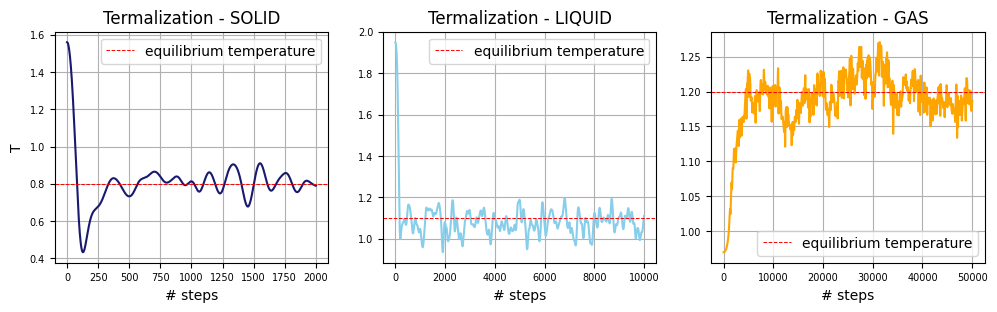

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import csv

fig1, tm = plt.subplots(1, 3, figsize=(12, 3))

sim = ["TERMSOLID","TERMLIQUID","TERMGAS"]

colors = ['midnightblue','skyblue','orange']

for i in range(3):
    mean = []
    with open('MOLECULAR_DYNAMIC/OUTPUT/'+sim[i]+"/temperature.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[1]))
    file.close()
    tm[i].plot(range(len(mean)), mean, color=colors[i])
    tm[i].set_xlabel('# steps')
    tm[0].set_ylabel('T')
    tm[0].set_title("Termalization - SOLID")
    tm[1].set_title("Termalization - LIQUID")
    tm[2].set_title("Termalization - GAS")
    tm[i].grid(True)
    if i == 0:
        tm[i].axhline(y=0.8, color='r',linestyle='--', label="equilibrium temperature", linewidth=0.7)
    elif i == 1:
        tm[i].axhline(y=1.10, color='r',linestyle='--', label="equilibrium temperature", linewidth=0.7)
    elif i == 2:
        tm[i].axhline(y=1.2, color='r',linestyle='--', label="equilibrium temperature", linewidth=0.7)
    tm[i].tick_params(axis='both', which='major', labelsize=7)
    tm[i].legend()

plt.show()

# Risultato delle simulazioni

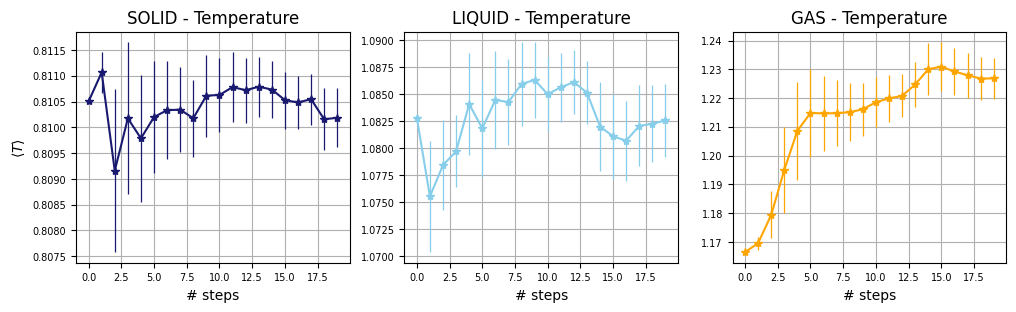

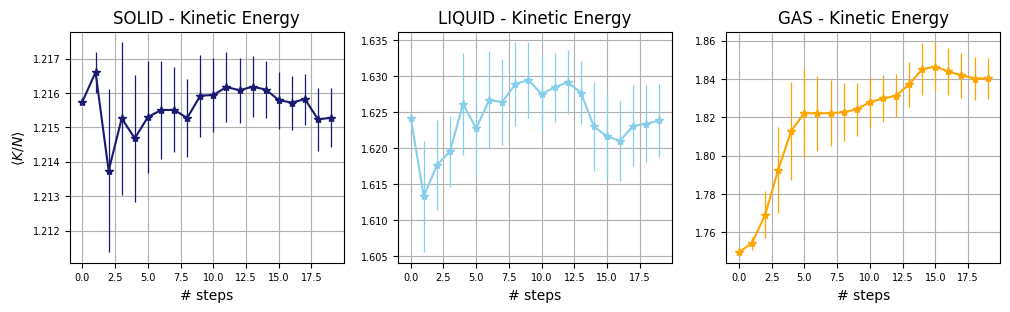

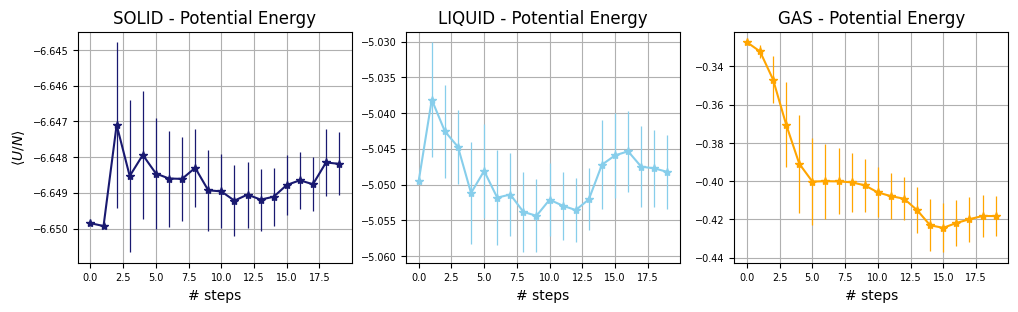

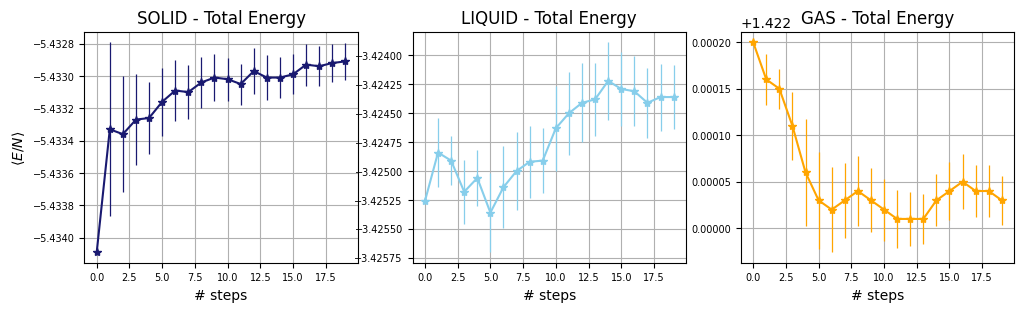

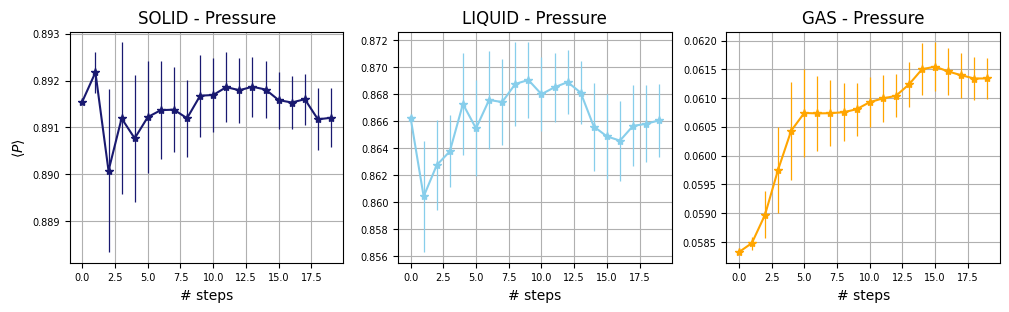

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import csv

sim = ["SOLID","LIQUID","GAS"]

colors = ['midnightblue','skyblue','orange']

fig1, tm = plt.subplots(1, 3, figsize=(12, 3))

for i in range(3):
    mean = []
    sigma = []
    with open('MOLECULAR_DYNAMIC/OUTPUT/'+sim[i]+"/temperature.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    tm[i].errorbar(range(len(mean)), mean, yerr=sigma, ecolor=colors[i] ,  marker='*', markersize=6, linestyle='-', elinewidth=0.9, alpha=1, color=colors[i])
    tm[i].set_xlabel('# steps')
    tm[0].set_ylabel(r'$\langle T \rangle$')
    tm[i].set_title(sim[i]+" - Temperature")
    tm[i].grid(True)
    tm[i].tick_params(axis='both', which='major', labelsize=7)

fig4, ke = plt.subplots(1, 3, figsize=(12, 3))

for i in range(3):
    mean = []
    sigma = []
    with open('MOLECULAR_DYNAMIC/OUTPUT/'+sim[i]+"/kinetic_energy.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    ke[i].errorbar(range(len(mean)), mean, yerr=sigma, ecolor=colors[i],  marker='*', markersize=6, linestyle='-', elinewidth=0.9, alpha=1, color=colors[i])
    ke[i].set_xlabel('# steps')
    ke[0].set_ylabel(r'$\langle K/N \rangle$')
    ke[i].set_title(sim[i]+" - Kinetic Energy")
    ke[i].grid(True)
    ke[i].tick_params(axis='both', which='major', labelsize=7)

fig3, pe = plt.subplots(1, 3, figsize=(12, 3))

for i in range(3):
    mean = []
    sigma = []
    with open('MOLECULAR_DYNAMIC/OUTPUT/'+sim[i]+"/potential_energy.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    pe[i].errorbar(range(len(mean)), mean, yerr=sigma, ecolor=colors[i],  marker='*', markersize=6, linestyle='-', elinewidth=0.9, alpha=1, color=colors[i])
    pe[i].set_xlabel('# steps')
    pe[0].set_ylabel(r'$\langle U/N \rangle$')
    pe[i].set_title(sim[i]+" - Potential Energy")
    pe[i].grid(True)
    pe[i].tick_params(axis='both', which='major', labelsize=7)

fig2, te = plt.subplots(1, 3, figsize=(12, 3))

for i in range(3):
    mean = []
    sigma = []
    with open('MOLECULAR_DYNAMIC/OUTPUT/'+sim[i]+"/total_energy.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    te[i].errorbar(range(len(mean)), mean, yerr=sigma, ecolor=colors[i],  marker='*', markersize=6, linestyle='-', elinewidth=0.9, alpha=1, color=colors[i])
    te[i].set_xlabel('# steps')
    te[0].set_ylabel(r'$\langle E/N \rangle$')
    te[i].set_title(sim[i]+" - Total Energy")
    te[i].grid(True)
    te[i].tick_params(axis='both', which='major', labelsize=7)

fig5, pr = plt.subplots(1, 3, figsize=(12, 3))

for i in range(3):
    mean = []
    sigma = []
    with open('MOLECULAR_DYNAMIC/OUTPUT/'+sim[i]+"/pressure.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    pr[i].errorbar(range(len(mean)), mean, yerr=sigma, ecolor=colors[i],  marker='*', markersize=6, linestyle='-', elinewidth=0.9, alpha=1, color=colors[i])
    pr[i].set_xlabel('# steps')
    pr[0].set_ylabel(r'$\langle P \rangle$')
    pr[i].set_title(sim[i]+" - Pressure")
    pr[i].grid(True)
    pr[i].tick_params(axis='both', which='major', labelsize=7)

plt.show()